In [1]:
!unzip week2_data.zip -d week2_data

Archive:  week2_data.zip
  inflating: week2_data/GVR.csv      
  inflating: week2_data/ACB.csv      
  inflating: week2_data/POW.csv      
  inflating: week2_data/STB.csv      
  inflating: week2_data/KDH.csv      
  inflating: week2_data/BVH.csv      
  inflating: week2_data/MBB.csv      
  inflating: week2_data/HPG.csv      
  inflating: week2_data/SAB.csv      
  inflating: week2_data/VIB.csv      
  inflating: week2_data/FPT.csv      
  inflating: week2_data/SSI.csv      
  inflating: week2_data/BID.csv      
  inflating: week2_data/PDR.csv      
  inflating: week2_data/VIC.csv      
  inflating: week2_data/TCB.csv      
  inflating: week2_data/VPB.csv      
  inflating: week2_data/VNM.csv      
  inflating: week2_data/MWG.csv      
  inflating: week2_data/VRE.csv      
  inflating: week2_data/VJC.csv      
  inflating: week2_data/GAS.csv      
  inflating: week2_data/PLX.csv      
  inflating: week2_data/MSN.csv      
  inflating: week2_data/VCB.csv      
  inflating: week2_data/C

In [43]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import math
import matplotlib.pyplot as plt
import random
from math import sqrt, log
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

# Read data

In [54]:
work_path = './week2_data'
list_path = os.listdir(work_path)
data_list = []
for data_path in list_path:
    data_list.append(pd.read_csv(work_path+"/"+data_path))
sample_list = random.sample(data_list , 10)
avg_price = [((ele['Close']+ele['Open'])/2) for ele in sample_list]
avg_log_return = [np.log(ele/ele.shift(1)) for ele in avg_price]
for idx, data in enumerate(sample_list):
    data['LogReturn'] = avg_log_return[idx]

date = sample_list[0]['Date']
return_df = pd.DataFrame()
return_df['Date'] = date
for data in sample_list:
    return_df[data.Symbol[1]] = data['LogReturn']
return_df.dropna(inplace=True)
return_df

,Date,PDR,ACB,GVR,SSI,POW,MSN,FPT,VPB,VJC,VIC
1,2022-10-04,0.005882,-0.022004,-0.065199,-0.036124,-0.019048,-0.039514,-0.007049,-0.024693,0.013096,0.023278
2,2022-10-05,0.005848,-0.018913,0.001320,0.008141,0.023232,0.005973,0.012145,0.011696,0.026562,0.039051
3,2022-10-06,-0.009766,-0.025379,-0.025385,-0.026011,-0.016843,-0.036388,-0.012788,-0.023530,-0.001749,0.020220
4,2022-10-07,-0.020824,-0.067071,-0.074420,-0.062968,-0.074925,-0.068552,-0.034035,-0.069312,0.002186,0.006650
5,2022-10-10,-0.009059,-0.034624,-0.023600,0.008824,-0.025494,-0.035499,-0.018140,-0.039029,-0.018956,-0.002489
...,...,...,...,...,...,...,...,...,...,...,...
60,2022-12-26,-0.046430,-0.017622,-0.042560,-0.056528,-0.009324,-0.005348,-0.001945,-0.034558,-0.010830,-0.022905
61,2022-12-27,-0.015968,-0.017938,0.000000,-0.001419,-0.009412,-0.018399,-0.007818,-0.009894,-0.006372,-0.014940
62,2022-12-28,0.066172,-0.002265,0.035591,0.039002,0.004717,0.008700,0.005219,0.023861,-0.003201,0.006564
63,2022-12-29,0.013097,-0.002270,-0.021202,-0.027703,-0.004717,0.009698,-0.006527,-0.004170,0.006848,-0.001871


# Calculate Correlation matrix

<Axes: >

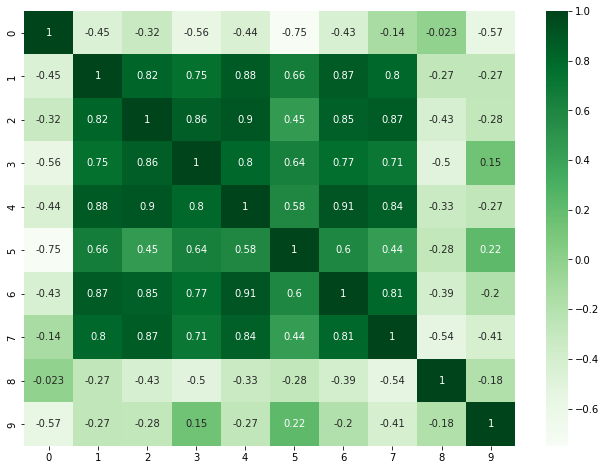

In [56]:
corr_matrix = np.corrcoef(return_df.corr())
plt.figure(figsize=(11,8))
sns.heatmap(corr_matrix, cmap="Greens",annot=True)

#  Calculate Autocorrelation matrix

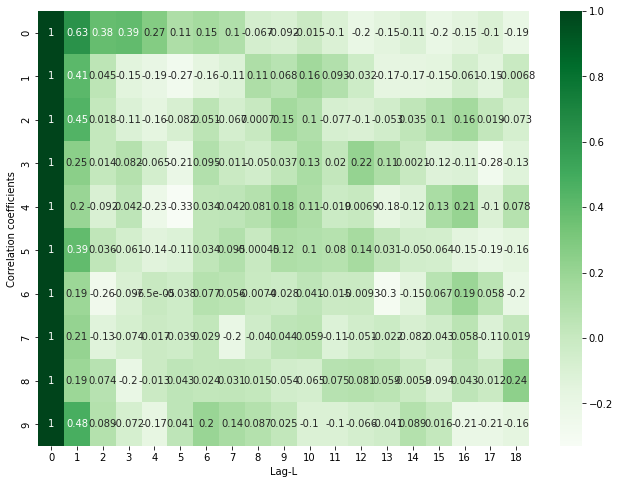

In [60]:
cols = return_df.columns[1:]
autocorr_matrix = np.stack([acf(return_df[name]) for name in cols], axis=0)
plt.figure(figsize=(11,8))
s = sns.heatmap(autocorr_matrix, cmap="Greens",annot=True)
s.set(xlabel='Lag-L', ylabel='Correlation coefficients')
plt.show()

# Hypothesis testing stationary and Correlation and White noise

In [62]:
def stationary_testing(ret, alpha=0.05):
    test_stats = adfuller(ret)
    p_value = test_stats[1]
    if p_value < alpha: # Reject null hypothesis
        return True
    return False    

def white_noise_testing(ret, alpha=0.05):
    data_len = len(ret)
    test_stats = sm.stats.acorr_ljungbox(ret, lags=int(np.log(data_len)), return_df=True)
    p_value = test_stats['lb_pvalue'][int(np.log(data_len))]
    if p_value > alpha: # Accept null hypothesis
        return True
    return False
 
for col in cols:
    if stationary_testing(return_df[col]) == True:
        print(str(col), 'log-return is weak stationary')
    else:
        print(str(col), 'log-return is not weak stationary')

print("")
for col in cols:
    if white_noise_testing(return_df[col]) == True:
        print(str(col), 'log-return is White Noise')
    else:
        print(str(col), 'log-return is not White Noise')

PDR log-return is not weak stationary
ACB log-return is weak stationary
GVR log-return is weak stationary
SSI log-return is weak stationary
POW log-return is weak stationary
MSN log-return is weak stationary
FPT log-return is weak stationary
VPB log-return is weak stationary
VJC log-return is weak stationary
VIC log-return is not weak stationary

PDR log-return is not White Noise
ACB log-return is not White Noise
GVR log-return is not White Noise
SSI log-return is White Noise
POW log-return is White Noise
MSN log-return is not White Noise
FPT log-return is White Noise
VPB log-return is White Noise
VJC log-return is White Noise
VIC log-return is not White Noise
